The following notebook will play around with TF Datasets

TensorFlow Datasets is a collection of datasets which are compatible with tensorflow
All datasets are exposed as APIs

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.0.0


In [3]:
tf.compat.v1.enable_eager_execution() # TF datasets are available in eager execution as well as graph mode

In [4]:
tfds.list_builders() # This lists down all the datasets which are available

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imagenet_resized',
 'imdb_reviews',
 'iris',
 '

A total of 122 datasets are available in this format. Ofcourse it means that if there is a new dataset, then you have to workout the pipeline

In [5]:
len(tfds.list_builders())

122

In [6]:
# load minist dataset

mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

/usr/local/lib/python3.5/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.5/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.5/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.5/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /home/jupyter/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.
<_OptionsDataset shapes: {label: (), image: (28, 28, 1)}, types: {label: tf.int64, image: tf.uint8}>


Specific version of the dataset can be loaded through the load method

```
mnist =tfds.load("mnist:1.*.*")
```





Label: 3


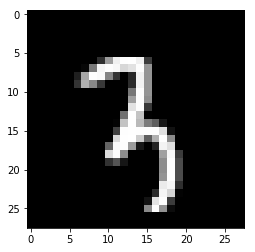

In [10]:
for mnist_example in mnist_train.take(1): # Consider only one example
    image, label = mnist_example['image'], mnist_example['label']
    
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap= plt.get_cmap('gray'))
    
    print("Label: %d" % label.numpy())
    

In [11]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<_OptionsDataset shapes: {label: (), image: (28, 28, 1)}, types: {label: tf.int64, image: tf.uint8}>

In [12]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

In [13]:
# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [15]:
squad_builder = tfds.builder("squad")
info = squad_builder.info
print(info)

tfds.core.DatasetInfo(
    name='squad',
    version=0.1.0,
    description='Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.
',
    urls=['https://rajpurkar.github.io/SQuAD-explorer/'],
    features=FeaturesDict({
        'answers': Sequence({
            'answer_start': Tensor(shape=(), dtype=tf.int32),
            'text': Text(shape=(), dtype=tf.string),
        }),
        'context': Text(shape=(), dtype=tf.string),
        'id': Tensor(shape=(), dtype=tf.string),
        'question': Text(shape=(), dtype=tf.string),
        'title': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=98169,
    splits={
        'train': 87599,
        'validation': 10570,
    },
    supervised_keys=None,
    citation="""@article{2016arXi

In [16]:
print(info.features)

FeaturesDict({
    'answers': Sequence({
        'answer_start': Tensor(shape=(), dtype=tf.int32),
        'text': Text(shape=(), dtype=tf.string),
    }),
    'context': Text(shape=(), dtype=tf.string),
    'id': Tensor(shape=(), dtype=tf.string),
    'question': Text(shape=(), dtype=tf.string),
    'title': Text(shape=(), dtype=tf.string),
})


In [18]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



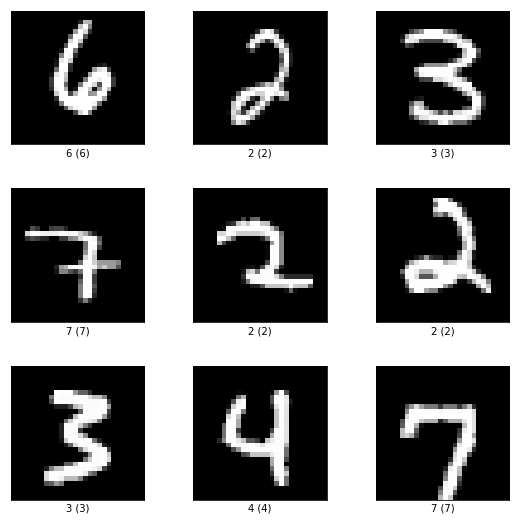

In [19]:
fig = tfds.show_examples(info, mnist_test)